# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

**Use the Heat Map to chose the most important variable**

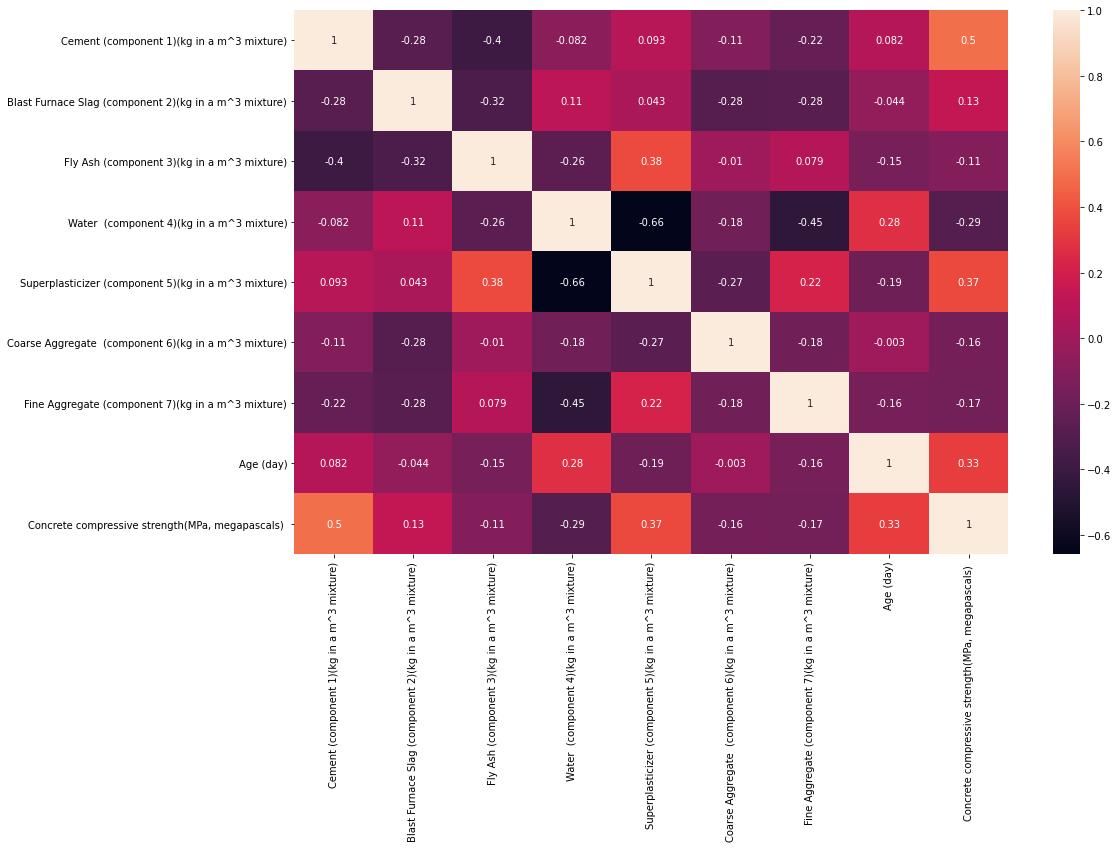

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()
# Saving
sns_plot.figure.savefig("Heat Map.png")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
# Importing the dataset
dataset = pd.read_excel('/content/drive/MyDrive/CapstonesData/Concrete_Data.xlsx')

In [4]:
df = dataset.copy()
df = df.dropna()

In [5]:
# df.isnull().sum()

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
X= df.iloc[:, 0:-1].values
y= df.iloc[:, -1].values

In [8]:
# pd.DataFrame(X)

In [9]:
X.shape

(1030, 8)

### Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 , shuffle= True)

In [10]:
print("X_train: ", X_train.shape)
print("Y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", y_test.shape)

X_train:  (824, 8)
Y_train:  (824,)
X_test:  (206, 8)
Y_test:  (206,)


### Preprocessing 

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x = sc_x.fit(X_train)
X_train_new = sc_x.transform(X_train)
X_test_new = sc_x.transform(X_test)

## Build Different Models

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()
regressor.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred_test = regressor.predict(X_test_new)
y_pred_train = regressor.predict(X_train_new)

#### Calculate r_score

In [49]:
from sklearn.metrics import r2_score
r_score = r2_score(y_train, y_pred_train)

In [50]:
r_score_test = r2_score(y_test, y_pred_test)

In [17]:
print("Reults of Linear Regression: ")
print("R-Squared of train data: {:2f}%".format(r_score*100))
print("R-Squared of test data: {:2f}%".format(r_score_test*100))



Reults of Linear Regression: 
R-Squared of train data: 60.907104%
R-Squared of test data: 63.689811%


##### **Conclusion**: Linear regression got a very small r_square

###  Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train_new)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred_train_poly = lin_reg_2.predict(X_poly)

## test data
X_poly_test = poly_reg.transform(X_test_new)
y_pred_test_poly = lin_reg_2.predict(X_poly_test)

In [21]:
from sklearn.metrics import r2_score
r_score = r2_score(y_train, y_pred_train_poly)
r_score_test = r2_score(y_test, y_pred_test_poly)

In [22]:
print("Reults of Polynomial Regression: ")
print("R-Squared of train data: {:2f}%".format(r_score*100))
print("R-Squared of test data: {:2f}%".format(r_score_test*100))

Reults of Polynomial Regression: 
R-Squared of train data: 99.334086%
R-Squared of test data: -332309911.554002%


##### **Conclusion:** Overfitting happened

##  Regularization Techniques

###  Ridge 

In [41]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [42]:
from sklearn.preprocessing   import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
Poly_X = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [43]:
coeff_matrix = pd.DataFrame()
result = []
arr = []
for alpha in [1e-35, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly.fit_transform(X_train), y_train)
    coeff_matrix = pd.concat([coeff_matrix,pd.DataFrame(ridge.coef_)])
    ##
    y_pred_test_rigid = ridge.predict(X_poly_test)
#     print(r2_score(y_test, y_pred_test_rigid))
    arr.append(alpha)
    arr.append(r2_score(y_test, y_pred_test_rigid))
    result.append(arr)
    arr = []

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56652e-37): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56652e-17): result may not be accurate.
  overwrite_a=True).T


> **The Following Function** to zip each accuracy with its alpha and finally return the largest accuracy

In [44]:
def list_of_lists_to_dictionary(list_of_list, key_col=0, val_col=1):
    # Create empty dictionary
    value_dict = {}
    # Iterate through list and add to dictionary
    for value in list_of_list:
        v = {value[key_col]: value[val_col]}
        value_dict.update(v)

    return value_dict

final_result = list_of_lists_to_dictionary(result)
max(final_result.values())

0.8504910870128015

In [45]:
def return_key(currency_dict, val):
    for key, value in currency_dict.items():
        if value==val:
            return key
    return('Key Not Found')
key_val = return_key(final_result, max(final_result.values()))

In [48]:
print("Reults of Polynomial Regression with Rigid Regularization: ")
print("Max R-Squared of test data: {:2f}%, at alpha:{}".format(max(final_result.values())*100, key_val))
ridge_score = max(final_result.values())

Reults of Polynomial Regression with Rigid Regularization: 
Max R-Squared of test data: 85.049109%, at alpha:0.001


0.8504910870128015

#### **Conclusion:** By adding regularization term using ridge to avoid overfitting, R-square increased

### Lasso

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [37]:
poly = PolynomialFeatures(degree=3)
Poly_X = poly.fit_transform(X_train_new)
X_poly_test = poly.transform(X_test_new)

In [38]:
coeff_matrix = []
result = []
arr = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1, 5, 10, 20]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(poly.fit_transform(X_train_new), y_train)
    coeff_matrix.append(lasso.coef_)
    ##
    y_pred_test_rigid = lasso.predict(X_poly_test)
    r_score_test = r2_score(y_test, y_pred_test_rigid)
    ##
    arr.append(alpha)
    arr.append(r_score_test)
    result.append(arr)
    arr = []

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8356.282712890172, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8356.282174986296, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8356.228915325239, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8295.5955

In [39]:
final_result = list_of_lists_to_dictionary(result)
max(final_result.values())

0.8466115587041502

In [40]:
def return_key(currency_dict, val):
    for key, value in currency_dict.items():
        if value==val:
            return key
    return('Key Not Found')
key_val = return_key(final_result, max(final_result.values()))

In [ ]:
print("Reults of Polynomial Regression with Rigid Regularization: ")
print("Max R-Squared of test data: {:2f}%, at alpha:{}".format(max(final_result.values())*100, key_val))

Reults of Polynomial Regression with Rigid Regularization: 
Max R-Squared of test data: 84.129275%, at alpha:0.0001


In [ ]:
#####################################################  Random Forest Regressor  ###################################################

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# Fitting the Regression Model to the dataset
regressor = RandomForestRegressor(n_estimators=65, random_state=0)
regressor.fit(X_train, y_train)

# Predicting a new reslt with Linear Regression
y_pred = regressor.predict(X_test)

In [ ]:
r_score_test = r2_score(y_test, y_pred)

In [ ]:
print("Reults of Random Forest Regressor: ")
print("Max R-Squared of test data: {:2f}%".format(r_score_test*100))

Reults of Random Forest Regressor: 
Max R-Squared of test data: 92.776927%


In [ ]:
#####################################################  Bagging Regressor  ###################################################

In [ ]:
from sklearn.ensemble import BaggingRegressor
# define dataset
# define the model
model = BaggingRegressor(n_estimators=10)
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r_score = r2_score(y_test, y_pred)
r_score

0.9049991885444413

In [ ]:
def generate_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 60, 65, 90, 100, 150, 250, 500, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = BaggingRegressor(n_estimators=n)
	return models

mdls = generate_models()
def generate_names_for_model():
  # evaluate the models and store results
  names = list()
  for name, model in mdls.items():
    # evaluate the model
    # store the results
    names.append(name)
  return names

def calculate_scores_for_models():
  r2_scores = []
  names = generate_names_for_model()
  for name in names:
    model = mdls[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_score = r2_score(y_test, y_pred)
    r2_scores.append(r_score)
  return r2_scores

In [ ]:
r2_scores = calculate_scores_for_models()
# r2_scores

In [ ]:
#####################################################  Boosting Regressor  ###################################################

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
r_score_test = r2_score(y_test, y_pred)
r_score_test

0.9321979734206451

In [ ]:
n_trees = [10, 50, 60, 65, 90, 100, 150, 250, 500, 500, 1000, 5000, 10000]
def generate_models():
	models = dict()
	# define number of trees to consider
	for n in n_trees:
		models[str(n)] = GradientBoostingRegressor(n_estimators=n)
	return models

mdls = generate_models()
def generate_names_for_model():
  # evaluate the models and store results
  names = list()
  for name, model in mdls.items():
    # evaluate the model
    # store the results
    names.append(name)
  return names

def calculate_scores_for_models():
  r2_scores = []
  names = generate_names_for_model()
  for name in names:
    model = mdls[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_score = r2_score(y_test, y_pred)
    r2_scores.append(r_score)
  return r2_scores

In [ ]:
r2_scores = calculate_scores_for_models()
r2_scores

[0.6262843382209597,
 0.8819206423048127,
 0.8891538871386697,
 0.8924286154045923,
 0.903098760903019,
 0.9054759623773353,
 0.9165872858325228,
 0.9237362468097428,
 0.9286558223077561,
 0.9318423795383126,
 0.9334003728395206,
 0.9333295083464337]

In [ ]:
index = r2_scores.index(max(r2_scores))
index

10

In [ ]:
print("Max R-Squared of test data: {:2f}% at n_trees = {}".format(max(r2_scores)*100, n_trees[index]))

Max R-Squared of test data: 93.340037% at n_trees = 1000


In [ ]:
#####################################################  XGBoost Regressor  ###################################################

In [ ]:
from xgboost import XGBRegressor, plot_tree
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[05:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
r_score_ = r2_score(y_test, y_pred)
r_score_

0.9430765677353247

# Regressor Class
> To do different types of Regression Methods

#### Imports for important Libraries

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

#### Class Implementation

In [26]:
class Regressor:
  def __init__(self):
    #  self.X_train = []
    #  self.X_test = []
    #  self.y_train = []
    #  self.y_test = []
    pass
    
  def preprocessing(self, dataset):
    df = dataset.copy()
    df = df.dropna()
    return df

  def split_data(self, X, y, test_size=0.2, random_state=0, shuffle= True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state , shuffle=shuffle)
    return X_train, X_test, y_train, y_test

  def normalization(self, train_data, test_data):
    sc_x = StandardScaler()
    sc_x = sc_x.fit(train_data)
    train_data = sc_x.transform(train_data)
    test_data = sc_x.transform(test_data)
    return train_data, test_data

  ############ Linear Regression ###########

  def linear_regression(self, X_train, y_train, X_test):
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return y_pred

  ############ Ploynomial Regression ###########
    
  def polynomial_regression(self, X_train, y_train, X_test, num_degrees=2):
    poly_reg = PolynomialFeatures(degree = num_degrees)
    X_poly = poly_reg.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)
    # y_pred_train_poly = regressor.predict(X_poly)
    ## test data
    X_poly_test = poly_reg.transform(X_test)
    y_pred = regressor.predict(X_poly_test)

    return y_pred

  ############ Ploynomial Regression (Ridge) ###########

  def polynomial_regression_ridge(self, X_train, y_train, X_test, num_degrees=2, alphas=[1e-35, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]):
    poly = PolynomialFeatures(degree=num_degrees)
    Poly_X = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    coeff_matrix = pd.DataFrame()
    result = []
    arr = []
    for alpha in alphas:
        ridge = Ridge(alpha = alpha, normalize=True)
        ridge.fit(poly.fit_transform(X_train), y_train)
        coeff_matrix = pd.concat([coeff_matrix,pd.DataFrame(ridge.coef_)])
        ##
        y_pred_test_rigid = ridge.predict(X_poly_test)
        arr.append(alpha)
        arr.append(r2_score(y_test, y_pred_test_rigid))
        result.append(arr)
        arr = []
    final_result = self.list_of_lists_to_dictionary(result)
    key_val = self.return_key(final_result, max(final_result.values()))
    return max(final_result.values()), key_val


  ############ Ploynomial Regression (Lasso) ###########

  def polynomial_regression_lasso(self, X_train, y_train, X_test, num_degrees=2, alphas=[1e-35, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]):
    poly = PolynomialFeatures(degree=num_degrees)
    Poly_X = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    coeff_matrix = []
    result = []
    arr = []
    for alpha in alphas:
        lasso = Lasso(alpha = alpha, normalize=True, tol=0.01)
        lasso.fit(poly.fit_transform(X_train), y_train)
        coeff_matrix.append(lasso.coef_)
        ##
        y_pred_test_rigid = lasso.predict(X_poly_test)
        r_score_test = r2_score(y_test, y_pred_test_rigid)
        ##
        arr.append(alpha)
        arr.append(r_score_test)
        result.append(arr)
        arr = []

    final_result = self.list_of_lists_to_dictionary(result)
    key_val = self.return_key(final_result, max(final_result.values()))
    return max(final_result.values()), key_val

  ############ Random Forest ############

  def random_forest(self, X_train, y_train, X_test, n_estimators=100, criterion="mse", max_depth=None, min_samples_split=2, min_samples_leaf=1):
    # Fitting the Regression Model to the dataset
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=0, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    regressor.fit(X_train, y_train)
    # Predicting a new reslt with Linear Regression
    y_pred = regressor.predict(X_test)
    return y_pred


  ############  Bagging Regressor ############
  def bagging(self, X_train, y_train, X_test, n_estimators):
    model = BaggingRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


  ############  Boosting Regressor ############
  def xg_boosting(self, X_train, y_train, X_test, n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8):
    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample, colsample_bytree=colsample_bytree, verbosity = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


  def gradient_boosting(self, X_train, y_train, X_test, n_estimators):
    model = GradientBoostingRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


  ############ Calculate R2 Score ###########

  def calculate_r2_score(self, y_test=None, y_pred=None, method=""):
    r_score = r2_score(y_test, y_pred)
    print("R-Squared of {} Method is: {:2f}%".format(method, r_score*100))
    self.check_high_score(r_score)
    return r_score
    
  def calculate_r2_score_regularization(self, score, alpha, method):
    print("Reults of Polynomial Regression with {} Regularization".format(method))
    print("Max R-Squared of test data: {:2f}%, at alpha:{}".format(score*100, alpha))
    self.check_high_score(score)
    # return 

  def check_high_score(self, r_score):
    if r_score*100 >= 92:
      print("Very High")
    elif r_score*100 < 92 and  r_score*100 > 88:
      print("High")
    elif r_score*100 < 88 and  r_score*100 > 80:
      print("Medium")
    elif r_score*100 < 80 and  r_score*100 > 50:
      print("Low")
    else:
      print("Very Low")

  ########### Additional Functions ###########

  def list_of_lists_to_dictionary(self, list_of_list, key_col=0, val_col=1):
    # Create empty dictionary
    value_dict = {}
    # Iterate through list and add to dictionary
    for value in list_of_list:
        v = {value[key_col]: value[val_col]}
        value_dict.update(v)

    return value_dict

  def return_key(self, currency_dict, val):
    for key, value in currency_dict.items():
        if value==val:
            return key
    return('Key Not Found')


In [27]:
# Importing the dataset
dataset = pd.read_excel('/content/drive/MyDrive/CapstonesData/Concrete_Data.xlsx')

#### Create Instance From the Class

In [28]:
regressor = Regressor()

#### Preprocessing for input data

In [29]:
# Do Preprocessing Techniques to input data
dataset = regressor.preprocessing(dataset)
# identify X, Y data
X= dataset.iloc[:, 0:-1].values
y= dataset.iloc[:, -1].values

#### Splitting Data into train, test

In [30]:
X_train, X_test, y_train, y_test = regressor.split_data(X, y, 0.2, 0, True)
# Calling Normalization Method (if needed)
X_train_n, X_test_n = regressor.normalization(X_train, X_test)

## Regression

#### Linear Regression

In [31]:
y_pred = regressor.linear_regression(X_train, y_train, X_test)
linear_reg_r2_score = regressor.calculate_r2_score(y_test, y_pred, "Linear Regression")

R-Squared of Linear Regression Method is: 63.689811%
Low


#### Polynomial Regression

In [32]:
y_pred = regressor.polynomial_regression(X_train, y_train, X_test, num_degrees=5)
ploy_reg_r2_score = regressor.calculate_r2_score(y_test, y_pred, "Polynomial Regression")

R-Squared of Polynomial Regression Method is: -320698260.226295%
Very Low


####Polynomial Regression - Ridge

In [34]:
ridge_r2_score, alpha = regressor.polynomial_regression_ridge(X_train, y_train, X_test, num_degrees=5)
regressor.calculate_r2_score_regularization(ridge_r2_score, alpha, "Ridge")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Reults of Polynomial Regression with Ridge Regularization
Max R-Squared of test data: 87.785677%, at alpha:0.001
Medium


#### Polynomial Regression - Lasso

In [35]:
lasso_r2_score, alpha = regressor.polynomial_regression_lasso(X_train, y_train, X_test, num_degrees=5)
regressor.calculate_r2_score_regularization(lasso_r2_score, alpha, "Lasso")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6564.395710729087, tolerance: 2325.8623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6564.39571074889, tolerance: 2325.8623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6564.397684245423, tolerance: 2325.8623112598066
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6564.59300

Reults of Polynomial Regression with Lasso Regularization
Max R-Squared of test data: 88.508365%, at alpha:0.0001
High


#### Random Forest


In [37]:
y_pred = regressor.random_forest(X_train, y_train, X_test, n_estimators=65)
randForest_r2_score = regressor.calculate_r2_score(y_test, y_pred, "Random Forest")

R-Squared of Random Forest Method is: 92.776927%
Very High


####Bagging Regression

In [38]:
y_pred = regressor.bagging(X_train, y_train, X_test, n_estimators=1000)
bagging_r2_score = regressor.calculate_r2_score(y_test, y_pred, "Bagging")

R-Squared of Bagging Method is: 92.235106%
Very High


#### XGBoosting Regression

In [39]:
y_pred = regressor.xg_boosting(X_train, y_train, X_test, n_estimators=850)
xgboost_r2_score = regressor.calculate_r2_score(y_test, y_pred, "XGBoost")

R-Squared of XGBoost Method is: 94.367340%
Very High


#### Gradient Boosting Regression

In [40]:
y_pred = regressor.gradient_boosting(X_train, y_train, X_test, n_estimators=1000)
gradientboost_r2_score = regressor.calculate_r2_score(y_test, y_pred, "Gradient Boosting")

R-Squared of Gradient Boosting Method is: 93.197734%
Very High


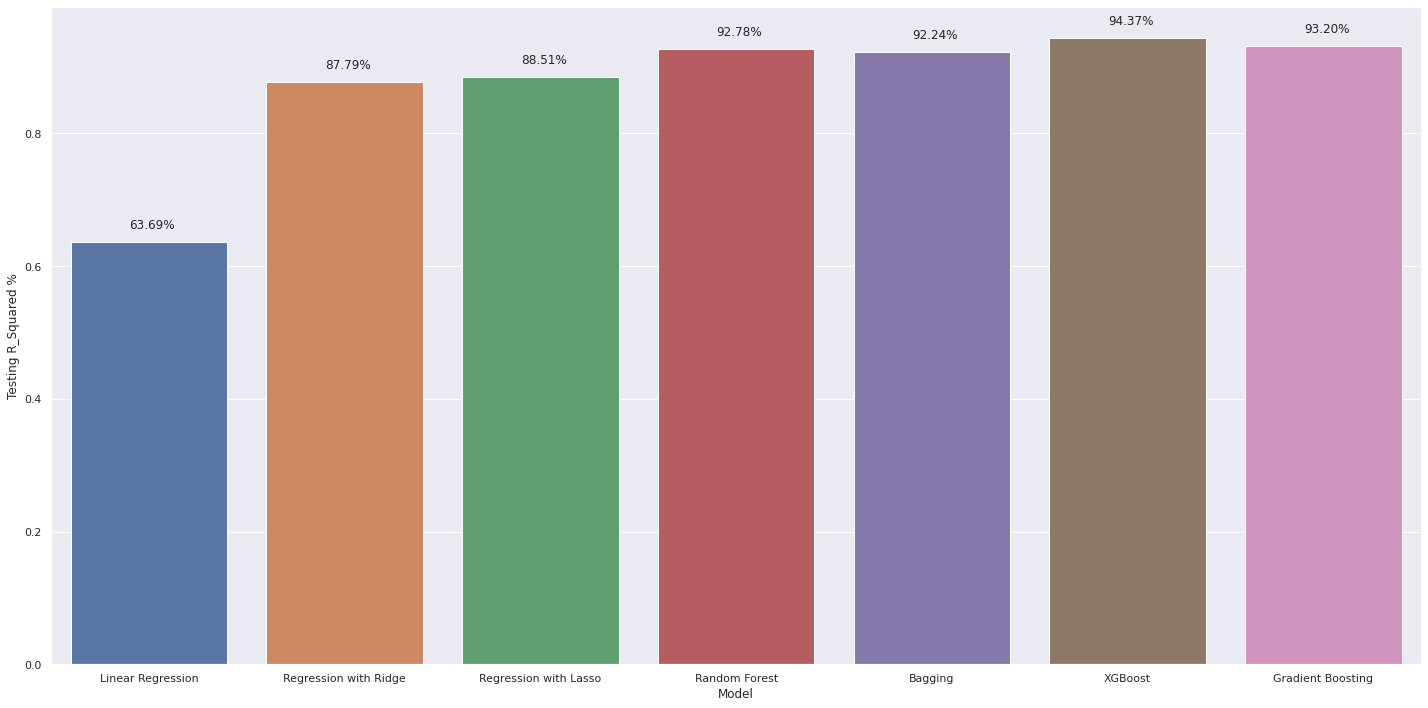

In [45]:
methods = ["Linear Regression","Regression with Ridge", "Regression with Lasso", "Random Forest", "Bagging", "XGBoost", "Gradient Boosting"]
accuracy = [linear_reg_r2_score, ridge_r2_score, lasso_r2_score, randForest_r2_score, bagging_r2_score, xgboost_r2_score, gradientboost_r2_score]

sns.set()
plt.figure(figsize=(20,10))
plt.ylabel("Testing R_Squared %")
plt.xlabel("Model")
sns.barplot(x=methods, y=accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, accuracy[idx]+0.02, "{:.2f}%".format(accuracy[idx]*100))
    
plt.tight_layout()

### **Conclusion:**
XGBoost Regression  the highest R_squared for test data

Simple Linear Regression 